# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [7]:
print(f"The rows are {data.shape[0]} and the columns are {data.shape[1]}")
print(f"Nan values = {data.isna().values.any()}")
print(f"duplicated rows  = {data.duplicated().values.any()}")#Is this different from the len(data[data.duplicated()])
print('\n')
print(f"The data type of the columns is {type(data.columns)}")
print("\n")
print('The head of the data set')
print(data.head())
print("\n")
print('The tail of the data set')
print(data.tail())




The rows are 5391 and the columns are 6
Nan values = False
duplicated rows  = False


The data type of the columns is <class 'pandas.core.indexes.base.Index'>


The head of the data set
   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000  


The tail of the data set
      Rank Release_Date                     Movie_Title USD_

In [8]:
print("The dataset info is below")
print(data.info())
print("\n")
print("The data sampple is;")
print(data.sample())

The dataset info is below
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


The data sampple is;
      Rank Release_Date    Movie_Title USD_Production_Budget  \
2989  2234    9/28/2007  The Game Plan           $22,000,000   

     USD_Worldwide_Gross USD_Domestic_Gross  
2989        $146,590,987        $90,648,202  


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
#Easiest way to achieve this is with a nested for loop
remove_sign = [',', '$']
columns_to_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for column in columns_to_convert:
    for char in remove_sign:
        #Replace char with empty string first
        data[column] = data[column].astype(str).str.replace(char, "")
    #convert the column to numeric
    data[column] = pd.to_numeric(data[column])

C:\Users\obisidan\AppData\Local\Temp\ipykernel_1220\325314845.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].astype(str).str.replace(char, "")


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
#converting the release data column ot a datetime 
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [11]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [12]:
grossed_0 = data[data.USD_Domestic_Gross == 0]
print(F"The number of films that grossed $0 domestically = {len(grossed_0)}")

The number of films that grossed $0 domestically = 512


In [13]:
#Highest budget and grossed nothing
grossed_0.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [14]:
#films that grossed $0 worldwide
grossed_0_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f"The number of films that grossed $0 worldwide = {len(grossed_0_worldwide)}")


The number of films that grossed $0 worldwide = 357


In [15]:
grossed_0_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [16]:
#If we want to select our data based on more than one condition? for example, which films made money internationally but had zro box office revenue in the united states
#We could create a filter two conditions using the .loc[] property combined with bitwise and operator
#Bitwise operators allow us to make comparisons on an element by element basis both in Numpy and pandas
#Because bitwise operator takes precedence, we need to include parentheses around comparisons 
releases_internationally = data.loc[(data.USD_Domestic_Gross == 0) &
                                    (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(releases_internationally)}")
releases_internationally.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [17]:
#Inside the query function we only use the column names
releases_internationally = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f"Number of international releases: {len(releases_internationally)}")
releases_internationally.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [18]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [19]:
not_released = data[data.Release_Date >= scrape_date]
print(f"Unreleased movies = {len(not_released)}")
not_released

Unreleased movies = 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [20]:
#new data frame that don't include the movies not released yet
data_clean = data.drop(not_released.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [21]:
#This calls for comparison to figure out what films were losing money
#You can use .loc[] or query
not_profitable = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
percentage = (not_profitable.shape[0]/data_clean.shape[0])*100 
print(f'{round(percentage,2)}%')

37.28%


# Seaborn for Data Viz: Bubble Charts

Creating normal scatter


<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

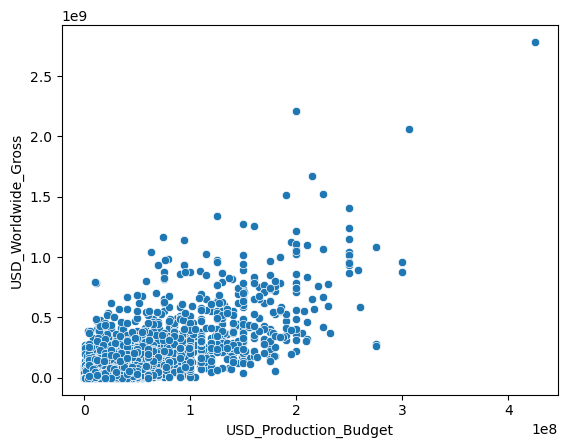

In [22]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:



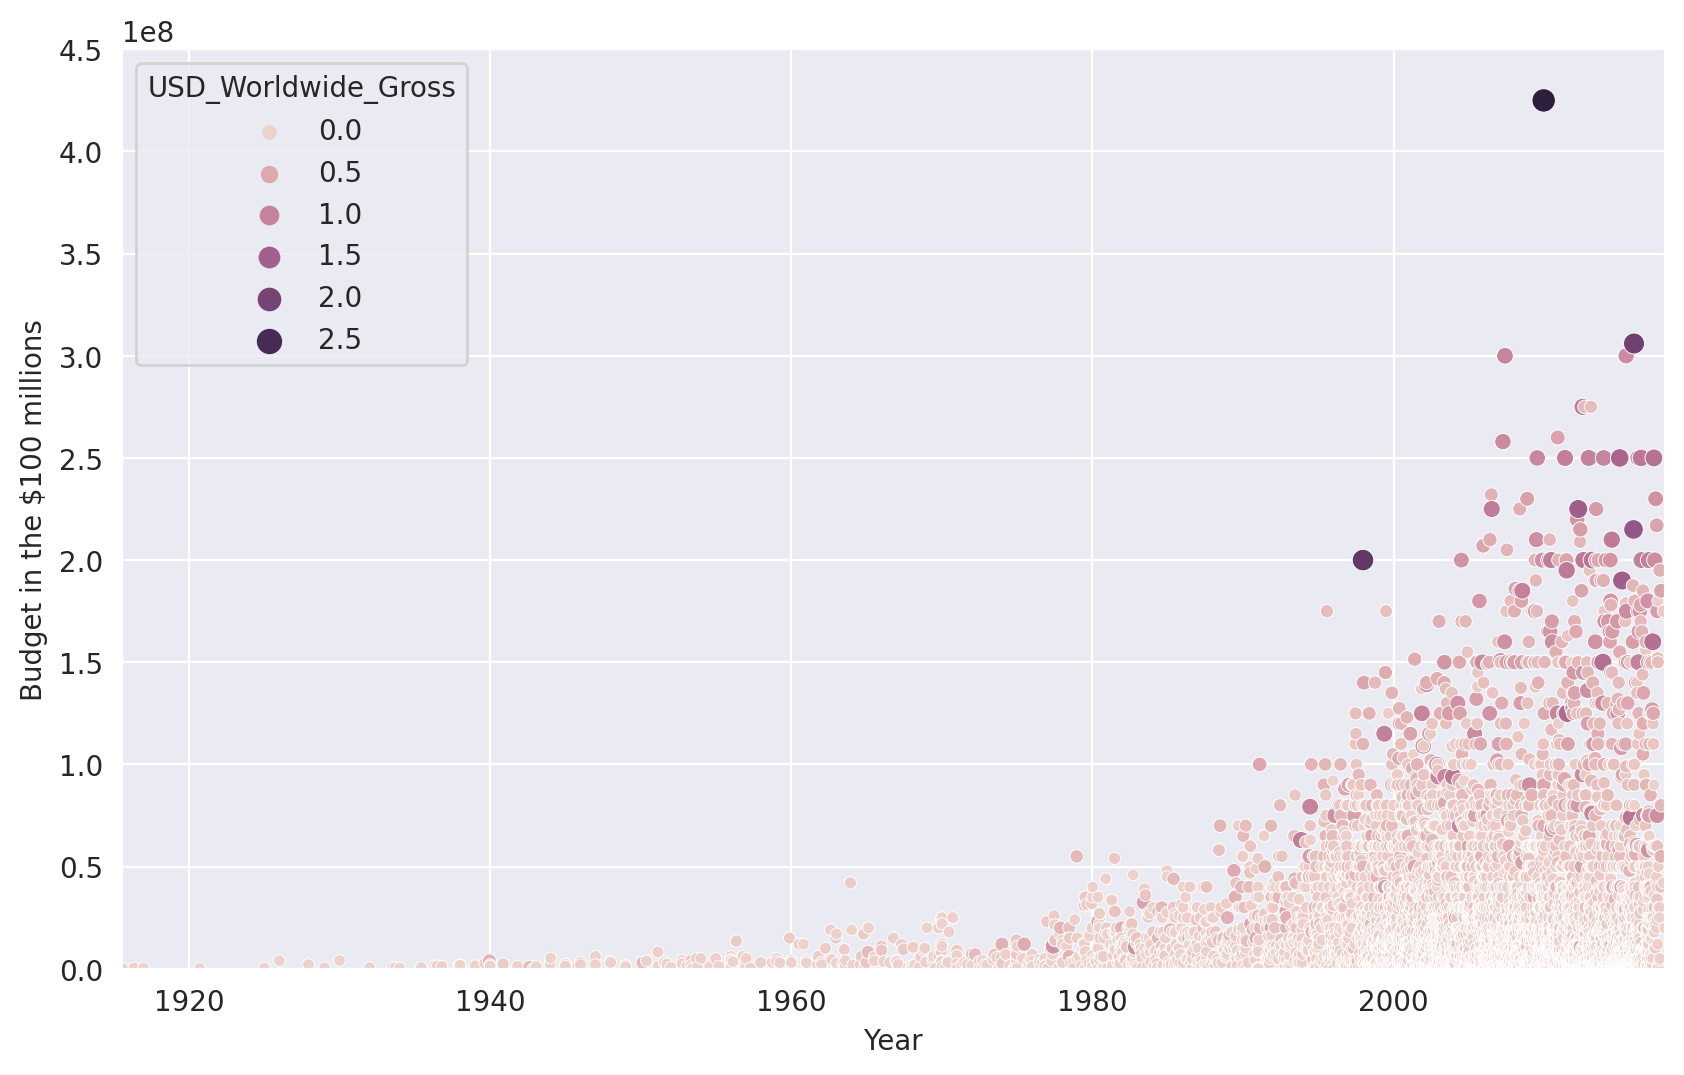

In [23]:
plt.figure(figsize=(10,6), dpi=199)

with sns.axes_style('darkgrid'):
    ax1 = sns.scatterplot(data=data_clean,
                            x='Release_Date',
                            y='USD_Production_Budget',
                            hue='USD_Worldwide_Gross',
                            size='USD_Worldwide_Gross')
    
    ax1.set(ylim=(0,450000000),
            xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
            xlabel='Year',
            ylabel='Budget in the $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [24]:
datetime_index = pd.DatetimeIndex(data_clean.Release_Date)
#.year grabs the years from the datetime index
year = datetime_index.year
decades = year//10*10
data_clean['Decade'] = decades
data_clean.head

<bound method NDFrame.head of       Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1     5140   1916-05-09                       Intolerance   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
...    ...          ...                               ...   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0                    110000             11000000            10000000    1910  
1                    385907                    0                   0    1910  


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [25]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade >= 1960]

In [26]:
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,"5,299.00","5,299.00","5,299.00","5,299.00","5,299.00"
mean,"2,668.18","31,495,337.37","89,978,800.28","41,637,987.40","1,999.67"
std,"1,548.85","40,599,414.12","169,520,086.33","66,382,160.58",10.54
min,1.00,"1,100.00",0.00,0.00,"1,960.00"
25%,"1,330.50","5,000,000.00","4,000,000.00","1,315,628.00","2,000.00"
50%,"2,656.00","17,500,000.00","28,350,000.00","17,498,804.00","2,000.00"
75%,"3,990.50","40,000,000.00","97,818,501.50","52,887,092.50","2,010.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00"


In [27]:
new_films.sort_values('USD_Production_Budget', ascending=False).head

<bound method NDFrame.head of       Rank Release_Date                               Movie_Title  \
3529     1   2009-12-18                                    Avatar   
5079     2   2015-12-18      Star Wars Ep. VII: The Force Awakens   
2911     3   2007-05-24  Pirates of the Caribbean: At World’s End   
4925     4   2015-06-11                                   Spectre   
4333     6   2013-02-07                           The Lone Ranger   
...    ...          ...                                       ...   
1209  5387   1999-02-04                                 Following   
2462  5388   2005-07-13             Return to the Land of Wonders   
5006  5389   2015-09-29                   Signed Sealed Delivered   
5007  5390   2015-09-29                      A Plague So Pleasant   
2427  5391   2005-05-08                         My Date With Drew   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
3529              425000000           2783918982           760

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

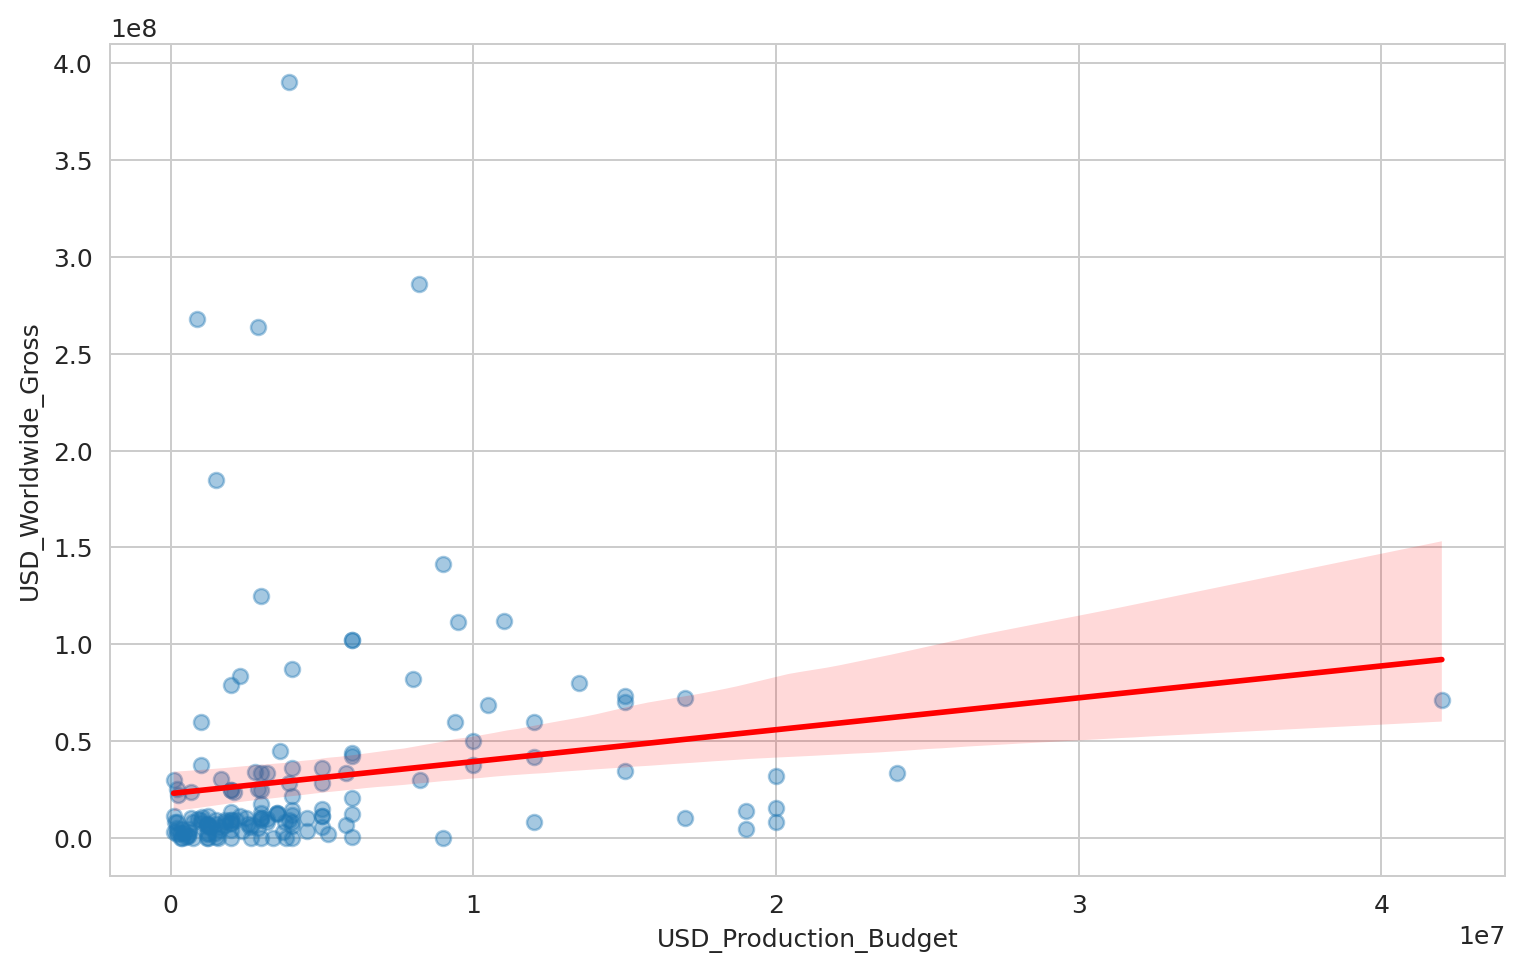

In [28]:
#First i'll do for old flims
plt.figure(figsize=(10,6), dpi=180)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha':0.4},
                line_kws={'color': 'red'})


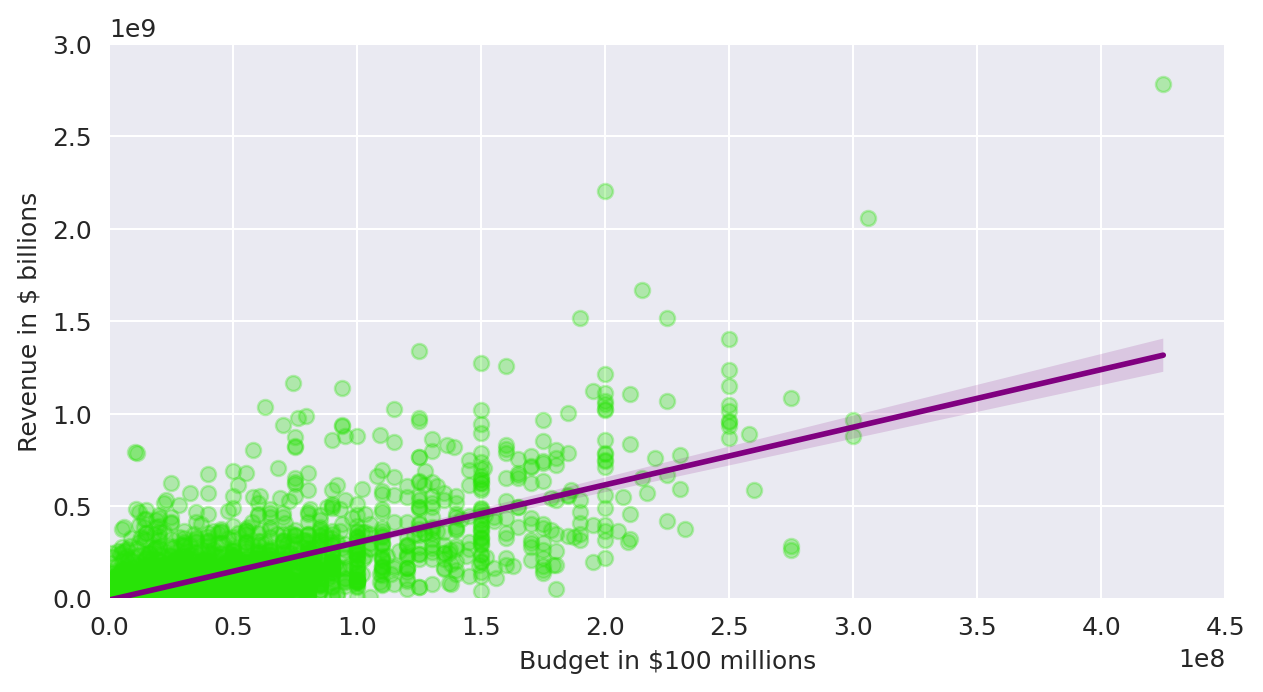

In [29]:
plt.figure(figsize=(8,4), dpi=180)
with sns.axes_style("darkgrid"):
    ax1 = sns.regplot(data=new_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                color='#28e307',
                scatter_kws={'alpha':0.3},
                line_kws={'color': 'purple'})
    
    ax1.set(ylim=(0,3000000000),
            xlim=(0,450000000),
            ylabel='Revenue in $ billions',
            xlabel='Budget in $100 millions')


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [30]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
#You will often see  the features names captial X and the target named lower case y
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
#find the best fit
regression.fit(X, y)
#Theta zero
print(regression.intercept_)
#Theta one
print(regression.coef_)



[-8211648.30378596]
[[3.11761857]]


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [31]:
#Theta zero
print(f"The slope coefficient is: {regression.intercept_[0]}")
print(f"The intercept is: {regression.coef_[0]}")
print(f"The r-squared is: {regression.score(X,y)}")

The slope coefficient is: -8211648.303785965
The intercept is: [3.11761857]
The r-squared is: 0.5574978047527492


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [32]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + (regression.coef_[0,0]*budget)
revenue_estimate = round(revenue_estimate, -6)
print(f"The estimated revenue for $350 film is around ${revenue_estimate:.10}.")

The estimated revenue for $350 film is around $1.083e+09.
